In [87]:
import feature_extraction as fe
import numpy as np
import pandas as pd

In [88]:
DIR = "/Users/rithikpothuganti/cs467/project"
aapl = fe.Feature_Extractor(f"{DIR}/data/aapl.csv")

aapl.price_data

/Users/rithikpothuganti/cs467/csci467-project/feature_extraction.py:41: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data = monthly_data.groupby('Date').mean()


,index,Date,Close/Last,Volume,Open,High,Low
0,2516,2013-03-13,$15.2982,405257558,15.3018,15.5179,15.1914
1,2515,2013-03-14,$15.4464,303205719,15.4582,15.5229,15.3732
2,2514,2013-03-15,$15.845,642349423,15.6404,15.8654,15.6161
3,2513,2013-03-18,$16.2757,599844320,15.7661,16.3379,15.7571
4,2512,2013-03-19,$16.2318,525875350,16.4107,16.4632,16.0179
...,...,...,...,...,...,...,...
2512,4,2023-03-06,$153.83,87558030,153.7850,156.3000,153.4600
2513,3,2023-03-07,$151.60,56182030,153.7000,154.0299,151.1300
2514,2,2023-03-08,$152.87,47204790,152.8100,153.4700,151.8300
2515,1,2023-03-09,$150.59,53833580,153.5590,154.5350,150.2250


In [89]:
aapl_2014_data = aapl.get_price_data_by_range("2014-01-01", "2014-12-31")

In [90]:
for i in range(0, 101):
    i /= 10
    print((i, aapl.get_price_probability(True, i, aapl_2014_data, "Open")))

(0.0, 0.5436507936507936)
(0.1, 0.5317460317460317)
(0.2, 0.5277777777777778)
(0.3, 0.5277777777777778)
(0.4, 0.5277777777777778)
(0.5, 0.5277777777777778)
(0.6, 0.5238095238095238)
(0.7, 0.5198412698412699)
(0.8, 0.5198412698412699)
(0.9, 0.5198412698412699)
(1.0, 0.5198412698412699)
(1.1, 0.5198412698412699)
(1.2, 0.5198412698412699)
(1.3, 0.5198412698412699)
(1.4, 0.5198412698412699)
(1.5, 0.5158730158730159)
(1.6, 0.5079365079365079)
(1.7, 0.503968253968254)
(1.8, 0.5)
(1.9, 0.5)
(2.0, 0.49603174603174605)
(2.1, 0.4880952380952381)
(2.2, 0.4880952380952381)
(2.3, 0.48412698412698413)
(2.4, 0.48412698412698413)
(2.5, 0.48412698412698413)
(2.6, 0.48412698412698413)
(2.7, 0.4801587301587302)
(2.8, 0.4722222222222222)
(2.9, 0.4722222222222222)
(3.0, 0.4642857142857143)
(3.1, 0.45634920634920634)
(3.2, 0.45634920634920634)
(3.3, 0.45634920634920634)
(3.4, 0.4523809523809524)
(3.5, 0.4365079365079365)
(3.6, 0.4365079365079365)
(3.7, 0.43253968253968256)
(3.8, 0.43253968253968256)
(3.9, 0

In [91]:
aapl.get_monthly_data()

/Users/rithikpothuganti/cs467/csci467-project/feature_extraction.py:41: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data = monthly_data.groupby('Date').mean()


,index,Volume,Open,High,Low
Date,,,,,
2013-03,2510.5,4.268737e+08,16.067833,16.231908,15.923267
2013-04,2493.5,4.949413e+08,14.991664,15.198327,14.811523
2013-05,2471.5,4.288858e+08,15.942900,16.130645,15.767695
2013-06,2450.5,3.505257e+08,15.284350,15.402510,15.073325
2013-07,2429.5,2.963106e+08,15.294905,15.452873,15.175232
...,...,...,...,...,...
2022-11,78.0,8.214039e+07,146.055952,148.032619,143.508124
2022-12,57.0,7.979673e+07,138.735810,140.166095,136.276905
2023-01,36.5,7.218264e+07,135.124750,137.271215,133.737000


In [92]:
aapl.monthly_return_data
# aapl.get_n_months_return_data("2014-01", 6)


,,index,Date,Close/Last,Volume,Open,High,Low,Return
Date,,,,,,,,,
2013-03,1,2505,2013-03,$15.8093,442473463,16.0650,16.1364,15.7721,0.049876
2013-04,3,2483,2013-04,$15.8136,690796964,15.5393,15.9018,15.4311,-0.015385
2013-05,5,2461,2013-05,$16.062,382752007,16.1607,16.3250,16.0536,0.018087
2013-06,7,2441,2013-06,$14.1618,578339209,13.9771,14.2954,13.8882,-0.131722
2013-07,9,2419,2013-07,$16.1618,322499391,16.2496,16.3337,16.0511,0.129872
...,...,...,...,...,...,...,...,...,...
2022-11,233,68,2022-11,$148.03,111380900,141.3950,148.7200,140.5500,-0.088245
2022-12,235,47,2022-12,$129.93,77034210,128.4100,129.9500,127.4300,-0.133594
2023-01,237,27,2023-01,$144.29,65874460,142.7000,144.3400,142.2800,0.095333


In [93]:
month_strings = []
for i in range(2014, 2022):
    for j in range(1, 13):
        month_strings.append(f"{i}-{j:02d}")

time_data = {}

for month in month_strings:
    time_data[month] = {}
    data = aapl.get_n_months_return_data(month, 5)
    label, features = aapl.get_labels_and_features(data)
    time_data[month]["label"] = label
    time_data[month]["features"] = features

In [94]:
time_data
# len(time_data)

{'2014-01': {'label': -0.10887497039660998,
  'features': [0.09729334308705195,
   0.0485866951643068,
   -0.0068645062874462814,
   -0.10887497039660998]},
 '2014-02': {'label': 0.05266177912469927,
  'features': [0.0485866951643068,
   -0.0068645062874462814,
   -0.10887497039660998,
   0.05266177912469927]},
 '2014-03': {'label': 0.03020285017332136,
  'features': [-0.0068645062874462814,
   -0.10887497039660998,
   0.05266177912469927,
   0.03020285017332136]},
 '2014-04': {'label': 0.10205303633817042,
  'features': [-0.10887497039660998,
   0.05266177912469927,
   0.03020285017332136,
   0.10205303633817042]},
 '2014-05': {'label': 0.07766673445932204,
  'features': [0.05266177912469927,
   0.03020285017332136,
   0.10205303633817042,
   0.07766673445932204]},
 '2014-06': {'label': 0.0169424152216735,
  'features': [0.03020285017332136,
   0.10205303633817042,
   0.07766673445932204,
   0.0169424152216735]},
 '2014-07': {'label': 0.038922155688622784,
  'features': [0.10205303633

In [426]:
import pandas as pd
import numpy as np

# Load stock prices from a CSV file or any source
df = pd.read_csv(f"{DIR}/data/aapl.csv")

df = df[::-1].reset_index()

# df['Close'] = df['Close/Last']

df
df['Close/Last'] = df['Close/Last'].apply(lambda x: float(str(x)[1:]))

# Calculate returns over various time windows
df['r_90d'] = df['Close/Last'].pct_change(62)
df['r_180d'] = df['Close/Last'].pct_change(125)
df['r_1y'] = df['Close/Last'].pct_change(250)
df['r_2y'] = df['Close/Last'].pct_change(500)
df['r_5y'] = df['Close/Last'].pct_change(1250)
df['r_10y'] = df['Close/Last'].pct_change(2500)


# Create a label column with the target return and buy/sell signal
df['target_return'] = df['Close/Last'].pct_change(255).shift(-255)
df['label'] = df.apply(lambda row: (1 if row['target_return'] > 0 else 0), axis=1)

# Select the relevant columns for the training examples
features = ['r_90d', 'r_180d', 'r_1y', 'r_2y', 'r_5y', 'r_10y']
label = ['target_return', 'label', 'Date', 'Close/Last']
df_ml = df.loc[255:, features + label].dropna(subset=['target_return'])


# Convert the data into training examples
df_ml = df_ml.sample(frac=1)
X = df_ml[features]
y = df_ml[label]

X.fillna(0, inplace=True)
# Split the data into training and test sets, e.g. 80% training and 20% test

split_idx = int(len(X) * 0.8)
X_train_df, y_train_df = X.iloc[:split_idx], y.iloc[:split_idx]
train_dates = df_ml["Date"].iloc[:split_idx]

test_dates = df_ml["Date"].iloc[split_idx:]
X_test_df, y_test_df = X.iloc[split_idx:], y.iloc[split_idx:]



/var/folders/ps/hbp83zj53cb60mmc6jt7f2s00000gn/T/ipykernel_44352/2171600100.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


In [243]:
import argparse
import sys

import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import pinv

OPTS = None


def read_logistic_data(X_df, Y_df):
    return X_df.to_numpy(), Y_df['label'].to_numpy()

def read_data(X_df, Y_df):
    return X_df.to_numpy(), Y_df['target_return'].to_numpy()
    x_list = []
    y_list = []
    with open(filename) as f:
        for line in f:
            x, y = [float(t) for t in line.strip().split('\t')]
            x_list.append(featurize(x, d=degree))
            y_list.append(y)
    return np.array(x_list), np.array(y_list)

def featurize(x, d=1):
    if d == 1:
        return x
    else:
        ### BEGIN_SOLUTION 3c
        features = x
        for i in range(2,d+1):
            features = np.concatenate((features,x**i), axis=1)
        return features
        ### END_SOLUTION 3c

def predict(w, X):
    """Return the predictions using weight vector w on inputs X.

    Args:
        - w: Vector of size (d,)
        - X: Matrix of size (m, d)
    Returns:
        - Predictions vector y_pred of size (m,)
    """
    ### BEGIN_SOLUTION 3a
    return X.dot(w)
    ### END_SOLUTION 3a

def train_gradient_descent(X_train, y_train, lr=1e-2, num_iters=400):
    """Train linear regression using gradient descent.

    Args:
        - X_train: Matrix of size (n, d)
        - y_train: Vector os size (n,)
        - lr: Learning rate (You can just use the default)
        - num_iters: Number of iterations of gradient descent to run (You can just use the default)
    Returns:
        - Weight vector w of size (d,)
    """
    N, D = X_train.shape
    ### BEGIN_SOLUTION 3a
    w = np.zeros(D)
    for i in range(num_iters):
        y_preds = predict(w,X_train)
        per_example_gradients = 2 * X_train.T * (y_preds - y_train)  
        gradient = np.mean(per_example_gradients, axis=1)
        w = w - lr * gradient
    ### END_SOLUTION 3a
    return w

def train_normal_equations(X_train, y_train):
    """Train linear regression using the normal equations.

    Args:
        - X_train: Matrix of size (n, d)
        - y_train: Vector os size (n,)
    Returns:
        - Weight vector w of size (d,)
    """
    
    ### BEGIN_SOLUTION 3b
    xTx = np.dot(X_train.T,X_train)
    xTx_inv = np.linalg.pinv(xTx)
    xTy = np.dot(X_train.T, y_train)
    w = np.dot(xTx_inv, xTy)
    return w
    ### END_SOLUTION 3b

def plot_sweep(degrees, train_rmses, dev_rmses):
    plt.clf()
    plt.plot(degrees, train_rmses, color='r', marker='*', linestyle='-', label='train')
    plt.plot(degrees, dev_rmses, color='b', marker='*', linestyle='-', label='dev')
    plt.xlabel('Degree')
    plt.ylabel('RMSE')
    plt.title('Train/Dev Error vs. Degree of predictor')
    plt.legend()
    plt.show()
    plt.savefig('rmse_vs_degree.png')

def plot_predictors(X_dev, y_dev, plot_xs, plot_data):
    plt.clf()
    plt.plot(X_dev[:,1], y_dev, marker='x', linestyle='')
    for y_preds, degree in plot_data:
        plt.plot(plot_xs, y_preds, marker='', linestyle='-', label=f'd={degree}', linewidth=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Learned Predictors for Different Degrees')
    plt.legend()
    plt.show()
    plt.savefig('predictions.png')

def evaluate(w, X, y, name):
    """Measure and print RMSE of a predictor on a dataset."""
    y_preds = predict(w, X)
    rmse = np.sqrt(np.mean((y_preds - y)**2))
    print('    {} RMSE: {}'.format(name, rmse))
    return rmse

def parse_degree(s):
    if ':' in s:
        start, end = s.split(':')
        return list(range(int(start), int(end) + 1))
    return [int(s)]

def parse_args():
    parser = argparse.ArgumentParser()
    parser.add_argument('--algorithm', '-a', choices=['gradient_descent', 'normal'], required=True)
    parser.add_argument('--degree', '-d', type=parse_degree, default=[1])
    parser.add_argument('--downsample-to', '-n', type=int, default=0)
    parser.add_argument('--plot-degrees', '-p', type=lambda s: [int(x) for x in s.split(',')], default=None)
    parser.add_argument('--test', action='store_true')
    if len(sys.argv) == 1:
        parser.print_help()
        sys.exit(1)
    return parser.parse_args()
    

# if __name__ == '__main__':
#     OPTS = parse_args()
#     main()



In [268]:
train_rmses = []
dev_rmses = []
plot_data = []
plot_xs = np.linspace(-2, 2, num=100)
DEGREE = 2
# Read in the data
X_train, y_train = read_data(X_train_df, y_train_df)
X_train = featurize(X_train, d=DEGREE)
X_dev, y_dev = read_data(X_test_df, y_test_df)
X_dev = featurize(X_dev, d=DEGREE)

# Train, either with gradient descent or normal equations
w = train_gradient_descent(X_train, y_train,lr=1e-2, num_iters=1000)
# w = train_gradient_descent(X_train, y_train)

# Evaluate on train, dev, and (if --test flag) test sets
train_rmse = evaluate(w, X_train, y_train, 'Train')
dev_rmse = evaluate(w, X_dev, y_dev, 'Dev')
train_rmses.append(train_rmse)
dev_rmses.append(dev_rmse)

# # Plot the learned functions, if -p flag
# if OPTS.plot_degrees and plot_data:
#     X_dev, y_dev = read_data('dev.tsv', 1)
#     plot_predictors(X_dev, y_dev, plot_xs, plot_data)

    Train RMSE: 0.34724408494616393
    Dev RMSE: 0.34902850925978834


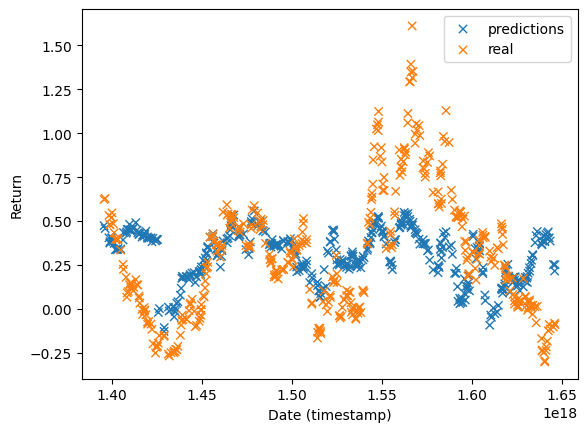

In [249]:
preds = predict(w, X_dev)

dates = df_ml['Date'].to_numpy()
preds = linreg_model.predict(X_dev)
test_dates = pd.to_datetime(test_dates).astype(int)
plt.scatter(test_dates.to_numpy(), preds, marker='x', linestyle='')
plt.scatter(test_dates.to_numpy(), y_dev, marker='x', linestyle='')
plt.legend(["predictions" , "real"])
plt.xlabel("Date (timestamp)")
plt.ylabel("Return")
plt.show()

In [269]:
from sklearn.linear_model import LinearRegression

DEGREE = 1
X_train, y_train = read_data(X_train_df, y_train_df)
X_train = featurize(X_train, d=DEGREE)
X_dev, y_dev = read_data(X_test_df, y_test_df)
X_dev = featurize(X_dev, d=DEGREE)

linreg_model = LinearRegression()  # No regularization
reg = linreg_model.fit(X_train, y_train)  # Train the model
print(reg.score(X_train, y_train))
w = linreg_model.coef_.flatten()  # Weight vector
# b = logreg_model.intercept_
print('w:', w)
# print('b:', b)


0.20182458275528325
w: [-0.37263525  0.38356431 -0.18016996 -0.40725414  0.11273193  0.        ]


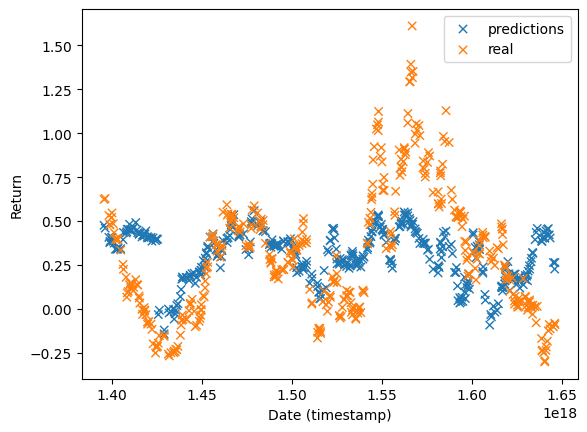

In [270]:
# plot linreg predictions
dates = df_ml['Date'].to_numpy()
preds = linreg_model.predict(X_dev)
test_dates = pd.to_datetime(test_dates).astype(int)
plt.scatter(test_dates.to_numpy(), preds, marker='x', linestyle='')
plt.scatter(test_dates.to_numpy(), y_dev, marker='x', linestyle='')
plt.legend(["predictions" , "real"])
plt.xlabel("Date (timestamp)")
plt.ylabel("Return")
plt.show()


In [433]:
from sklearn.linear_model import LogisticRegression

DEGREE = 7
X_train, y_train = read_logistic_data(X_train_df, y_train_df)
X_train = featurize(X_train, d=DEGREE)
X_dev, y_dev = read_logistic_data(X_test_df, y_test_df)
X_dev = featurize(X_dev, d=DEGREE)

log_reg = LogisticRegression(max_iter=200)  # No regularization
reg = log_reg.fit(X_train, y_train)  # Train the model
print(reg.score(X_train, y_train))
w = log_reg.coef_.flatten()  # Weight vector
# b = logreg_model.intercept_

def evaluate(model, X, y, name):
  preds = model.predict(X)  # vector of size n
  acc = np.mean(preds == y)
  print(f'{name} accuracy: ', acc)

evaluate(log_reg, X_dev, y_dev, "logistic regression, dev")

0.8292834890965732
logistic regression, dev accuracy:  0.8059701492537313


In [381]:
# logistic regression accuracy

def evaluate(model, X, y, name):
  preds = model.predict(X)  # vector of size n
  acc = np.mean(preds == y)
  print(f'{name} accuracy: ', acc)

evaluate(log_reg, X_dev, y_dev, "logistic regression, dev")

logistic regression, dev accuracy:  0.8731343283582089


(402, 2)


(-0.44216014317951907, 1.0513681592039799)

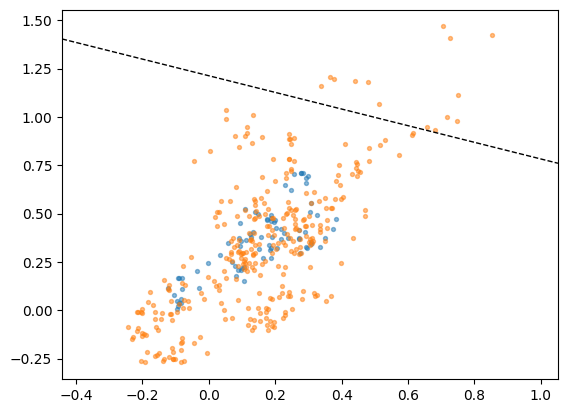

In [399]:
# X = X_dev[]
START = 1
X=X_dev[:,START:START+2]
Y=y_dev
print(X.shape)
b = log_reg.intercept_[0]
w1, w2 = w[START], w[START+1]
c = -b/w2
m = -w1/w2

ymin, ymax = np.min(X[:,1]) - 0.2, np.max(X[:,1]) + 0.2
xd = np.array([np.min(X[:,0]) - 0.2, np.max(X[:,0]) + 0.2])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')

plt.scatter(*X[Y==0].T, s=8, alpha=0.5)
plt.scatter(*X[Y==1].T, s=8, alpha=0.5)
plt.xlim(xd)